In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression


In [8]:
# Import the data
data="/kaggle/input/usa-housingcsv/USA_Housing.csv"
df = pd.read_csv(data)

# Print the first five rows of the data
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
# Print the last five rows of the data
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [10]:
# Print the shape of the data
df.shape

(5000, 7)

In [11]:
# Print the column names of the data
df.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [36]:
df['Address']=df['Address'].astype('category')
df['Address']=df['Address'].cat.codes
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                           int16
dtype: object

In [37]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                           int16
dtype: object

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06
Address,5000.0,2.499500e+03,1443.520003,0.000000,1249.750000,2.499500e+03,3.749250e+03,4.999000e+03


The dataset containing 5,000 observations for six variables: "Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population", and "Price".

For each variable, the summary includes the count of observations, mean, standard deviation, minimum and maximum values, and the 25th, 50th (median), and 75th percentiles.

Based on this summary, it is possible to see the range and distribution of each variable, as well as any potential outliers.

In [39]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734,-0.000479
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543,-0.007904
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664,0.012017
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071,0.021650
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556,0.019739
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000,0.008710
Address,-0.000479,-0.007904,0.012017,0.021650,0.019739,0.008710,1.000000


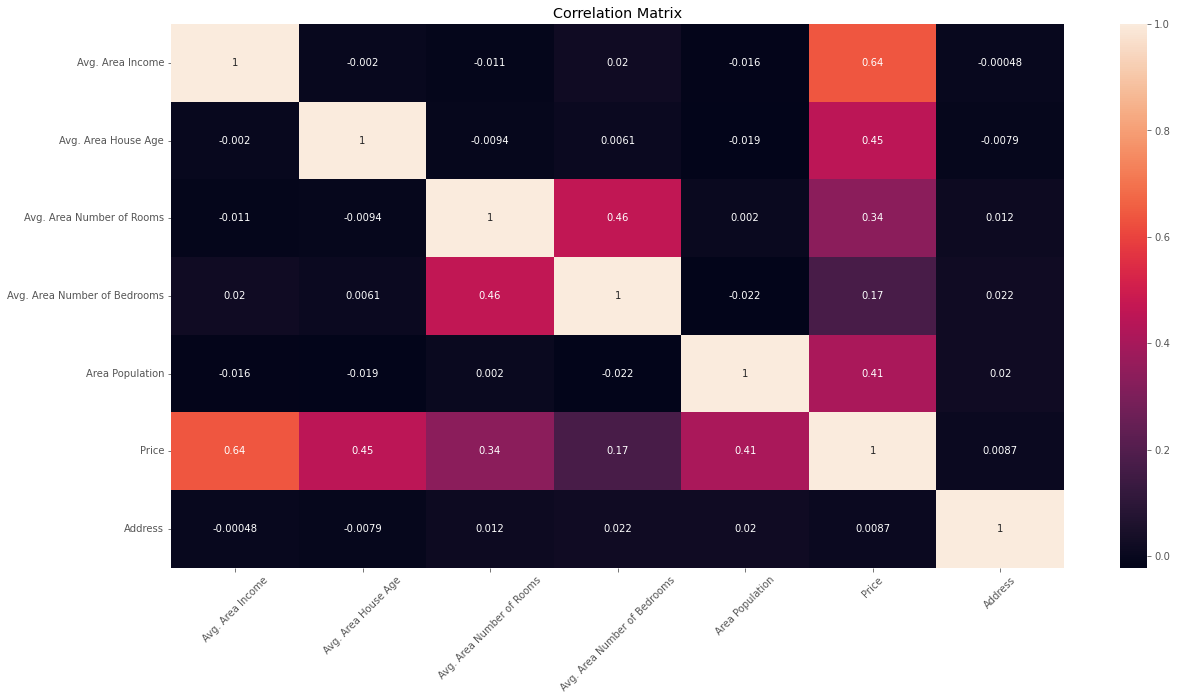

In [40]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot=True);

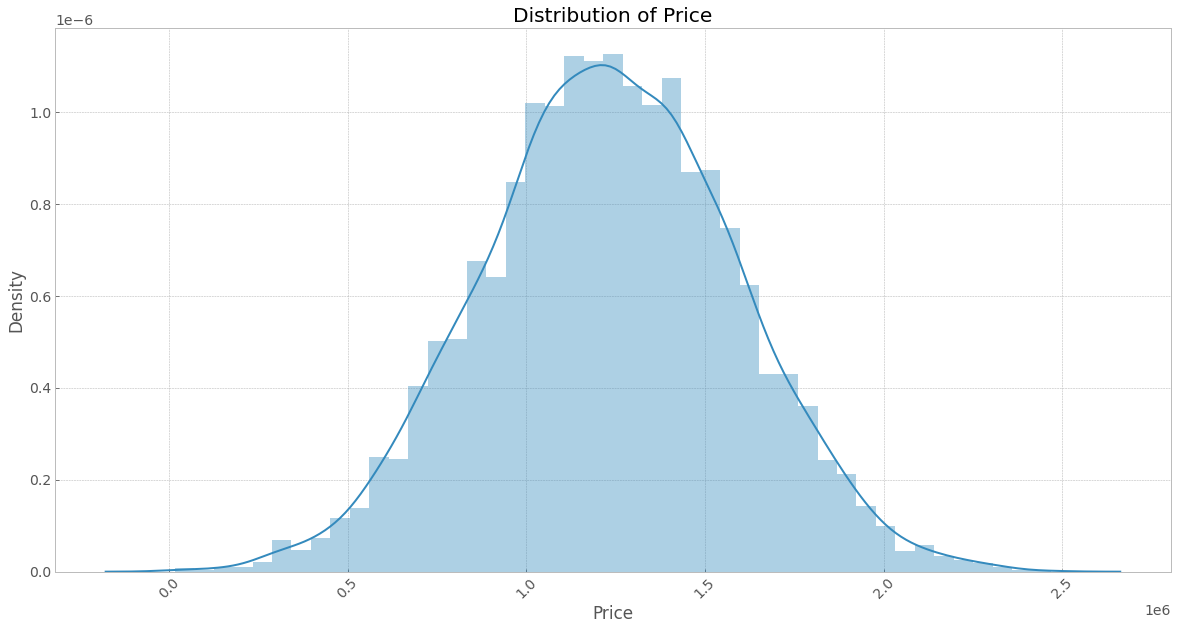

In [41]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(rotation=45)
plt.title('Distribution of Price')
sns.distplot(df['Price']);

In [42]:
# Feature matrix
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
X_train.head(),X_test.head()

(      Avg. Area House Age  Avg. Area Number of Rooms  \
 2913             6.675697                   7.275193   
 3275             6.919663                   8.266994   
 775              7.224281                   7.809919   
 217              6.279537                   7.325380   
 1245             7.588559                   6.406118   
 
       Avg. Area Number of Bedrooms  Area Population         Price  Address  
 2913                          3.17     48694.864144  1.616937e+06     4800  
 3275                          3.24     49958.580994  1.881075e+06     4126  
 775                           6.43     48918.055356  1.930344e+06     4179  
 217                           4.24     31294.652460  8.859206e+05     3367  
 1245                          2.30     41930.375009  1.266210e+06      777  ,
       Avg. Area House Age  Avg. Area Number of Rooms  \
 398              5.299694                   6.234615   
 3833             5.344664                   6.001574   
 4836           

In [45]:
y_train.head(),y_test.head()

(2913    80196.242251
 3275    74130.606324
 775     67384.000373
 217     59569.537340
 1245    58385.215373
 Name: Avg. Area Income, dtype: float64,
 398     61200.726175
 3833    63380.814670
 4836    71208.269301
 4572    50343.763518
 636     54535.453719
 Name: Avg. Area Income, dtype: float64)

In [46]:
X_train.shape,X_test.shape


((4000, 6), (1000, 6))

In [47]:
y_train.shape,y_test.shape

((4000,), (1000,))

In [58]:
from sklearn.metrics import mean_squared_error

## Linear regression object

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse1=mean_squared_error(y_test,y_pred)
rmse1=np.sqrt(mse)
r2a=r2_score(y_test,y_pred)
print('MSE:',mse1)
print('RMSE:',rmse1)
print('R2:',r2a)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

MSE: 19323831.843462236
RMSE: 4422.139524538033
R2: 0.8279069646798373
4395.888060843024


## Polynomial regression object

In [79]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
mse2=mean_squared_error(y_test,y_pred)
rmse2=np.sqrt(mse)
r2b=r2_score(y_test,y_pred)
print('MSE:',mse2)
print('RMSE:',rmse2)
print('R2:',r2b)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

MSE: 19654261.44134761
RMSE: 4422.139524538033
R2: 0.8249642443684434
4433.312693838278


In [80]:
# Ridge regression object
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse3=mean_squared_error(y_test,y_pred)
rmse3=np.sqrt(mse)
r2c=r2_score(y_test,y_pred)
print('MSE:',mse3)
print('RMSE:',rmse3)
print('R2:',r2c)

MSE: 19323837.327612136
RMSE: 4422.139524538033
R2: 0.8279069158394203


In [81]:
# Lasso regression object
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse4=mean_squared_error(y_test,y_pred)
rmse4=np.sqrt(mse)
r2d=r2_score(y_test,y_pred)
print('MSE:',mse4)
print('RMSE:',rmse4)
print('R2:',r2d)

MSE: 19323823.371420614
RMSE: 4422.139524538033
R2: 0.8279070401296429


In [82]:
# Elastic net regression object
model = ElasticNet(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse5=mean_squared_error(y_test,y_pred)
rmse5=np.sqrt(mse)
r2e=r2_score(y_test,y_pred)
print('MSE:',mse5)
print('RMSE:',rmse5)
print('R2:',r2e)

MSE: 19555317.97448146
RMSE: 4422.139524538033
R2: 0.8258454092262227


## Compare the results of all the models

In [86]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression',
 'Elastic Net Regression'], 'MSE': [mse1, mse2, mse3, mse4, mse5], 'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse5], 
 'R2': [r2a, r2b, r2c, r2d, r2e]})
results

,Model,MSE,RMSE,R2
0,Linear Regression,1.932383e+07,4422.139525,0.827907
1,Polynomial Regression,1.965426e+07,4422.139525,0.824964
2,Ridge Regression,1.932384e+07,4422.139525,0.827907
3,Lasso Regression,1.932382e+07,4422.139525,0.827907
4,Elastic Net Regression,1.955532e+07,4422.139525,0.825845


The table shows the performance metrics of five different regression models, namely Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, and Elastic Net Regression. The metrics evaluated are Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 score.

All five models have the same RMSE value of 4422.139525, indicating that they make similar errors on average. The Linear, Ridge, and Lasso regression models have the same MSE and R2 score, suggesting that they are equally good at predicting the target variable. The Polynomial and Elastic Net regression models have slightly higher MSE and slightly lower R2 score, which means they are not as accurate as the other three models.

## Plot the results

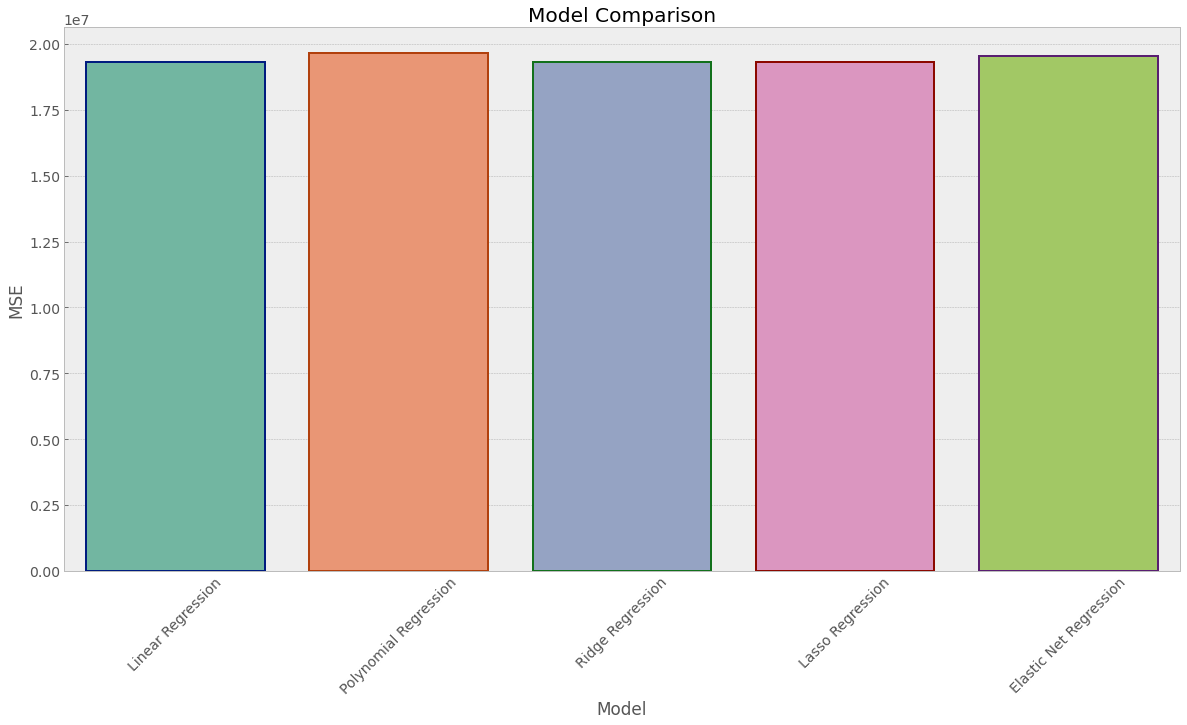

In [91]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14
plt.style.use('bmh')
plt.xticks(rotation=45)
plt.title('Model Comparison')
sns.barplot(x='Model', y='MSE', data=results, palette='Set2', edgecolor=sns.color_palette('dark', 5), linewidth=2)
plt.show()

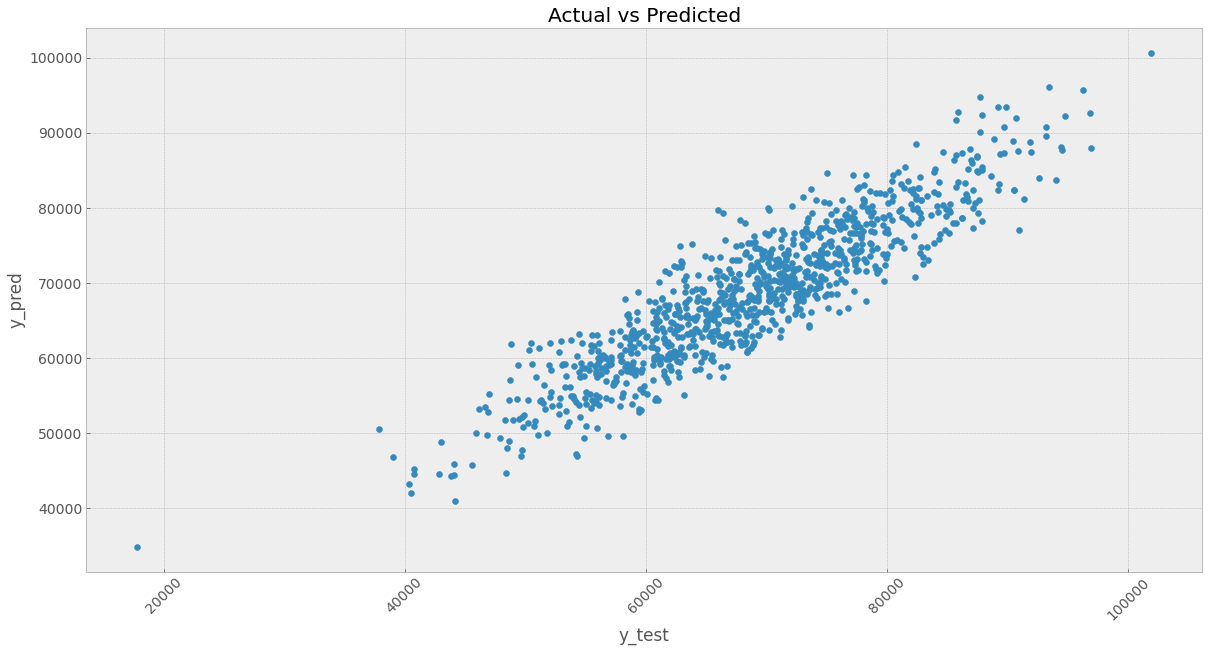

In [70]:
# use graph for the results
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14
plt.style.use('bmh')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted')

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

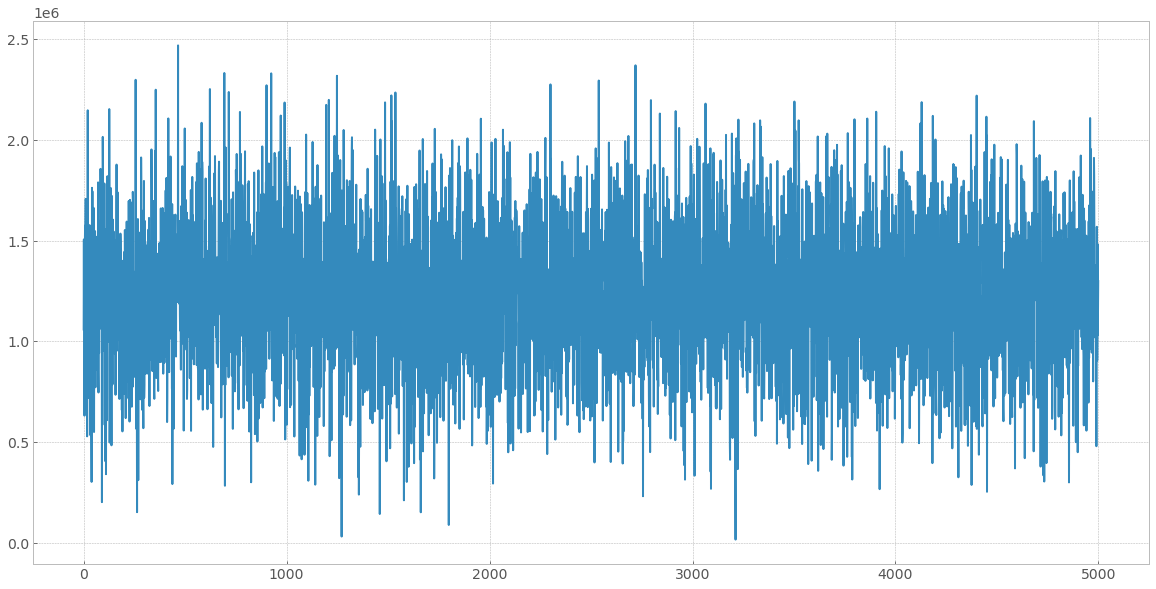

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(df['Price'])
plt.show()


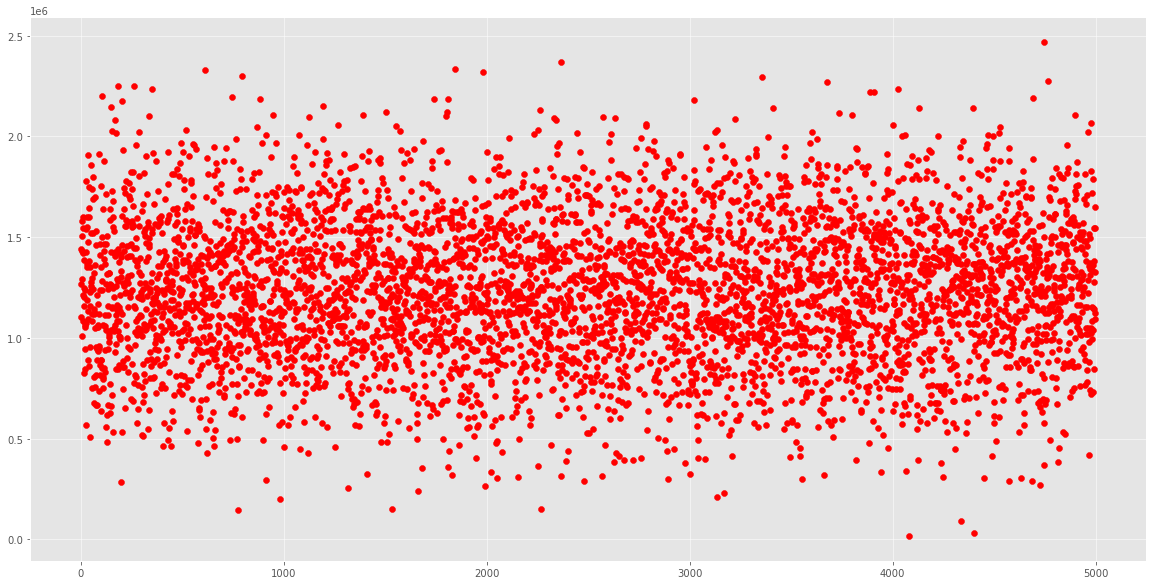

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.scatter(df['Address'],df['Price'],color='red')
plt.show()